In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

For telcos one of the business problems they face is customer churn. This means users have unsubscribed to their services in effect reducing their potential income. With this you are tasked to build a classifiation model using KNN & Logistic Regression. By having this model, the company is able to be more proactive in preventing customer churn. The dataset contains the following features

- customerId - unique identifier for customer
- gender - customer gender male/female
- SeniorCitizen	- indicator if customer is senior citizent 0/1
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines	- Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod	- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

For this dataset our model will be optimized based on the Churn field 

In [3]:
churn_df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
model_data = churn_df.copy(deep=True)

#remove customerId column from the model data
model_data.drop("customerID", inplace=True, axis=1)
#convert gender to numeric
model_data.gender = model_data.gender.apply(lambda x: 1 if x == 'Female' else 0)
#convert SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn & etc
for c in ['SeniorCitizen', 'Partner', 
          'Dependents', 'PhoneService', 
          'PaperlessBilling', 'Churn',
          'MultipleLines', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV',
          'StreamingMovies']:
    model_data[c] = model_data[c].apply(lambda x: 1 if x == 'Yes' else 0) 

#convert TotalCharges to float
model_data.TotalCharges = pd.to_numeric(model_data.TotalCharges, errors='coerce')
model_data.TotalCharges = model_data.TotalCharges.fillna(value=-1)

#one hot encode features with multiple categories 
multi_categorical_features = ['InternetService', 'Contract', 'PaymentMethod']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
display(res)
display(res)
display(res.todense())
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())
display(res_df)


model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

model_data.head()

<7043x10 sparse matrix of type '<class 'numpy.float64'>'
	with 21129 stored elements in Compressed Sparse Row format>

<7043x10 sparse matrix of type '<class 'numpy.float64'>'
	with 21129 stored elements in Compressed Sparse Row format>

matrix([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.]])

,x0_DSL,x0_Fiber optic,x0_No,x1_Month-to-month,x1_One year,x1_Two year,x2_Bank transfer (automatic),x2_Credit card (automatic),x2_Electronic check,x2_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,x0_DSL,x0_Fiber optic,x0_No,x1_Month-to-month,x1_One year,x1_Two year,x2_Bank transfer (automatic),x2_Credit card (automatic),x2_Electronic check,x2_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X = model_data.drop("Churn", axis=1) #store to X the features used for modeling (independent variables)
y = model_data["Churn"]#store to y our target (dependent variable)

In [6]:
model_data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Stacking Method via Sklearn

Sklearn has the `VotingClassifier` and `VotingRegressor` class available to do the stacking method. Using these classes a majority vote is done to predict classification problems while the average forecasts from the different models is used for regression problems.

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

### Create a logistic regression and knn model using grid search

In [18]:
lr_params = {
    "penalty": ["l1", "l2"], 
    "C": [0.1, 1, 10]
} 
lr_estimator = LogisticRegression(random_state=42, solver="liblinear")

lr_cv = GridSearchCV(lr_estimator, lr_params, 
                     verbose=0)

lr_cv.fit(X_train, y_train)
lr_model = lr_cv.best_estimator_



In [19]:
knn_params = {
    "n_neighbors": np.arange(1, 20), 
    "weights": ["uniform", "distance"], 
}

knn_estimator = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_estimator, knn_params, 
                      verbose=0)
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_


### Print Test Accuracy for Logistic Regression and KNN 

In [20]:
print(f"KNN{knn_model.score(X_test, y_test)}")
print(f"LR{lr_model.score(X_test,y_test)}")

KNN0.7799337434926644
LR0.8069096071935636


### Use Voting Classifer for the best models from KNN and Logistic Regression

In [22]:
eclf = VotingClassifier([('lr', lr_model), ('knn', knn_model)])
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=14))])

In [25]:
eclf.score(X_test, y_test)

0.7870326549929011

using gridsearch with the VotingClassifier

In [26]:
param_grid = {
    'lr__C': [0.1, 1, 10],
    "lr__penalty": ["l1", "l2"], 
    "lr__solver": ["liblinear"],
    "knn__n_neighbors": range(5,20)
}

eclf = VotingClassifier(estimators=[('lr', LogisticRegression()), ('knn', KNeighborsClassifier())])
eclf_grid = GridSearchCV(eclf, param_grid)
eclf_grid.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('knn',
                                                     KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(5, 20),
                         'lr__C': [0.1, 1, 10], 'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear']})

In [27]:
eclf_grid.best_estimator_.score(X_test, y_test)

0.7979176526265973

## Bagging Method with Random Forest

These are a few hyperparameters that we can tune when using Random Forest.

- n_estimators: # of estimators in the forest, default is 100
- max_depth: max depth of the trees in the forest, default is to expand until all leaves are pure 
- min_sample_split: The minimum number of samples required to split an internal node:
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- max_features: The number of features to consider when looking for the best split:


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [30]:
param_grid = {
    "n_estimators": range(100, 150, 10),
    "max_depth": range(5,50,5),
    "min_samples_split": np.arange(.1,.6,.1),
    "min_samples_leaf": np.arange(.1,.6,.1),
    "max_features": np.arange(0.1, 0.6, .1)
}

clf = RandomForestClassifier()
clf_grid = RandomizedSearchCV(clf, param_grid, n_iter=25)
clf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': range(5, 50, 5),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'n_estimators': range(100, 150, 10)})

In [31]:
clf_grid.best_estimator_.score(X_test, y_test)

0.7856128726928537

### Plot feature importance for Random Forest

<AxesSubplot:xlabel='importance', ylabel='feature'>

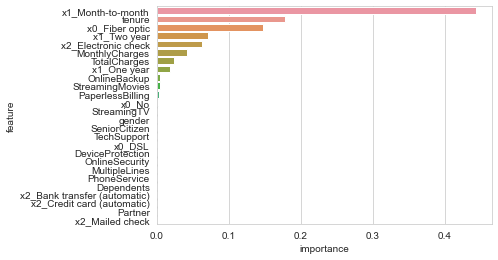

In [32]:
feat_df = pd.DataFrame()
feat_df['feature'] = X_train.columns
feat_df['importance'] = clf_grid.best_estimator_.feature_importances_
feat_df = feat_df.sort_values('importance', ascending=False)
sns.barplot(y=feat_df['feature'], 
            x=feat_df['importance'])

## Boosting Method with XGB

XGBoost is not readily available in Scikitlearn so we have to install it separately. You have to run this command to install it.

In [ ]:
! conda install -c conda-forge xgboost

These are a few hyperparameters commonly used for tuning XGBoost

- n_estimators: specifies the number of decision trees to be boosted. The default value is 100.
- subsample: the subsample ratio of the training sample. Example a subsample of .5 means that 50% of training data is used prior to growing a tree. 
- max_depth: Limits the depth of the tree. The default value is 6.
- learning_rate (alias: eta): Regularization parameter that shrinks feature weights in each boosting step. The default value is 0.3.
- gamma (alias: min_split_loss): it’s another regularization parameter for tree pruning. It specifies the minimum loss reduction required to grow a tree. The default value is set at 0.
- reg_alpha (alias: alpha): it is the L1 regularization parameter, increasing its value makes the model more conservative. Default is 0.
- reg_lambda (alias: lambda): L2 regularization parameter, increasing its value also makes the model conservative. Default is 1.

<a href="https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9">Source from Alam M.</a>

In [1]:
import xgboost as xgb

For XGBoost to be able to read our data it needs to be places inside a DMatrix object. This is an optimized data stucture used for memory management and training speed enhancement. 

In [8]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [11]:
params = {
    'n_estimators': range(100,500, 50),
    'max_depth': range(5,50, 5),
    'learning_rate': [0.1, 0.001, 0.00001, 1],
    'gamma': np.arange(0.5, 2, .2),
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3, 4.5]
}

clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False)
clf_grid = RandomizedSearchCV(clf, params, n_iter=10)
clf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           mon...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
               

In [12]:
clf_grid.best_estimator_.score(X_test, y_test)

0.7808802650260294

<AxesSubplot:xlabel='importance', ylabel='feature'>

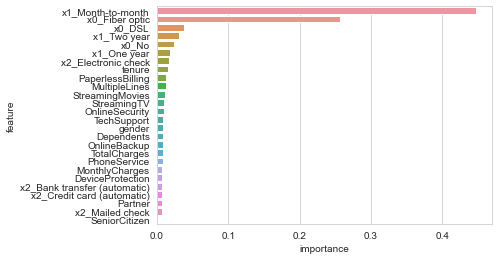

In [13]:
feat_df = pd.DataFrame()
feat_df['feature'] = X_train.columns
feat_df['importance'] = clf_grid.best_estimator_.feature_importances_
feat_df = feat_df.sort_values('importance', ascending=False)
sns.barplot(y=feat_df['feature'], 
            x=feat_df['importance'])